In [ ]:
!nvidia-smi

Mon May 22 18:18:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.12.0


In [ ]:
!pip install -q tensorflow==2.3.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0)
ERROR: No matching distribution found for tensorflow==2.3.0


In [ ]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 15.19 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.4/218.4 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you

In [ ]:
# !pip install bert-for-tf

# Importing and Downloading Data

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.12.0
Eager mode:  True
Hub version:  0.13.0
GPU is available


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 
os.environ['KAGGLE_KEY'] = 

In [ ]:
!kaggle competitions download -c shai-training-2023-a-level-2

 97% 25.0M/25.7M [00:02<00:00, 13.6MB/s]
100% 25.7M/25.7M [00:02<00:00, 9.98MB/s]


In [ ]:
!unzip shai-training-2023-a-level-2.zip

Archive:  shai-training-2023-a-level-2.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: Valid.csv               
  inflating: sample_submission.csv   


In [ ]:
train = pd.read_csv('/content/Train.csv')

In [ ]:
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
train.shape

(40000, 2)

In [ ]:
validation = pd.read_csv('/content/Valid.csv')
validation

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0
...,...,...
4995,"Man, I loved this movie! This really takes me ...",1
4996,Recovery is an incredibly moving piece of work...,1
4997,"You can take the crook out of the joint, but i...",1
4998,FUTZ is the only show preserved from the exper...,1


EDA

<Axes: title={'center': 'Target Distribution'}, ylabel='Frequency'>

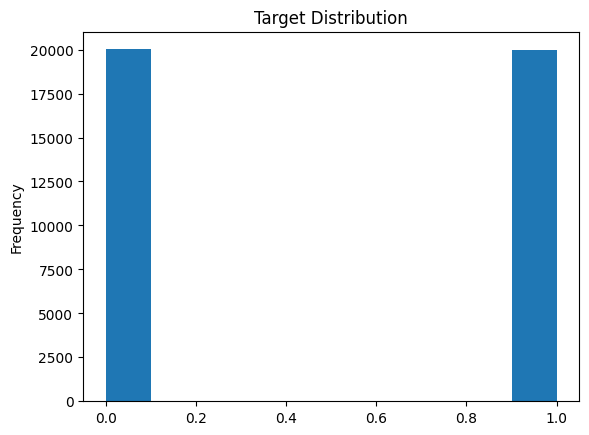

In [ ]:
train.label.plot(kind = 'hist', title = 'Target Distribution')

We have equal classes

**Create tf.data.Datasets for Training and Evaluation**

prepare tensors 

In [ ]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train['text'].values, train['label'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((validation['text'].values, validation['label'].values))

In [ ]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

label_list = [0,1]
max_seq_length = 200
train_batch_size = 32

# Get BERT layer and tokenizer:
#import BERT model as keras layer, fine tune the parameter of the model
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2', trainable=True)
# tokenizer do all the preprocessing 
vocab_files = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_files, do_lower_case)

In [ ]:
lengths = train['text'].apply(lambda x: len(tokenizer.wordpiece_tokenizer.tokenize(x)))


In [ ]:
lengths.max()

2934

max tokenized list is 3155, because we didn't delete the stopwords and punctioations.
Let's try to train without cleaning first, and then judg the results

**Tokenize and Preprocess Text for BERT**

This is a Python function that takes in four parameters: `text`, `label`, `label_list`, `max_seq_length`, and `tokenizer`. 

The function creates an `InputExample` object from the `text` and `label` parameters, where `text` is the input text and `label` is the corresponding label for that text. 

Then, the function uses the `convert_single_example` method from the `classifier_data_lib` library to convert the `InputExample` object into a feature object. This feature object contains four attributes: `input_ids`, `input_mask`, `segment_ids`, and `label_id`. 

`input_ids` is a list of integers representing the tokenized input text, where each integer corresponds to a specific token in the vocabulary. 

`input_mask` is also a list of integers, where each integer indicates whether a token is a padding token or not. 

`segment_ids` is a list of integers that is used for tasks that involve multiple sentences, where each integer indicates which sentence a token belongs to. 

`label_id` is an integer that represents the label for the input text.

Finally, the function returns the four attributes of the feature object as separate variables.

In [ ]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid= None, text_a = text.numpy(), 
                                             text_b = None, label= label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer)

  return(feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)
  
  

In [ ]:
def to_feature_map(text, label):
  input_ids,input_mask, segment_ids,label_id = tf.py_function(to_feature, inp = [text, label],
                                                              Tout = [tf.int32,tf.int32,tf.int32,tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x ={
      'input_word_ids':input_ids,
      'input_mask':input_mask,
      'input_type_ids':segment_ids
  }
  return(x, label_id)

In [ ]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map, 
                               num_parallel_calls= tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32, drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))
  

  # valid
  valid_data = (valid_data.map(to_feature_map, 
                               num_parallel_calls= tf.data.experimental.AUTOTUNE)
  .batch(32, drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))

In [ ]:
# train data spec
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 200), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 200), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 200), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# valid data spec
valid_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 200), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 200), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 200), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

Add a Classification Head to the BERT Layer

In [ ]:
# Building the model
def create_model():
    input_word_ids=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name = 'input_word_ids')
    input_mask=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name = 'input_mask')
    input_type_ids=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name = 'input_type_ids')

    pooled_output, sequance_output = bert_layer([input_word_ids, input_mask, input_type_ids])

    drop = tf.keras.layers.Dropout(0.4)(pooled_output)
    output = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'output')(drop)

    model = tf.keras.Model(
        inputs = {
         'input_word_ids' : input_word_ids,
         'input_mask': input_mask,
         'input_type_ids':input_type_ids
        },
        outputs = output
    )
    return model 

Fine-Tune BERT for Text Classification

In [ ]:
model = create_model()
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 2e-5),
              loss = tf.keras.losses.BinaryCrossentropy(), 
              metrics= [tf.keras.metrics.BinaryAccuracy()]
              )
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 200)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 200)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 200)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 200, 768)]                'input_mask[0][0]',         

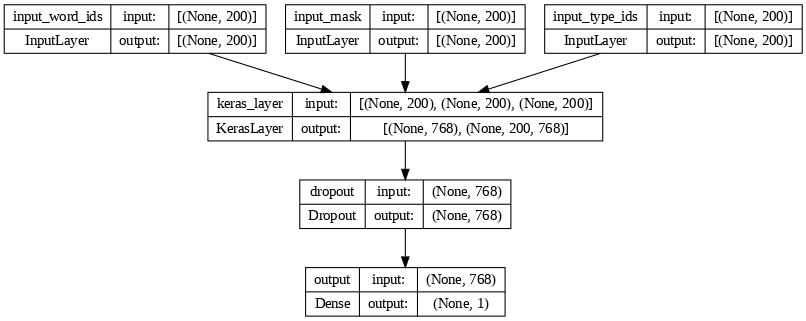

In [ ]:
tf.keras.utils.plot_model(model = model , show_shapes=True, dpi = 76)

In [ ]:
# Train model
epochs = 2
history = model.fit(train_data, 
                    validation_data = valid_data,
                    epochs = epochs,
                    verbose = 1)


Epoch 1/2
1250/1250 [==============================] - 1711s 1s/step - loss: 0.2625 - binary_accuracy: 0.8900 - val_loss: 0.2192 - val_binary_accuracy: 0.9145
Epoch 2/2
1250/1250 [==============================] - 1703s 1s/step - loss: 0.1560 - binary_accuracy: 0.9406 - val_loss: 0.2234 - val_binary_accuracy: 0.9179


In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

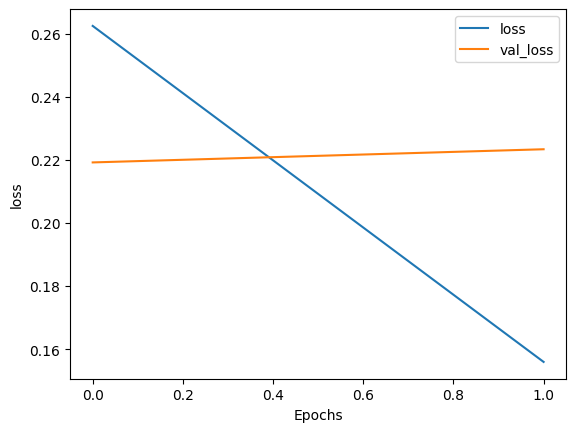

In [ ]:
plot_graphs( history, 'loss')

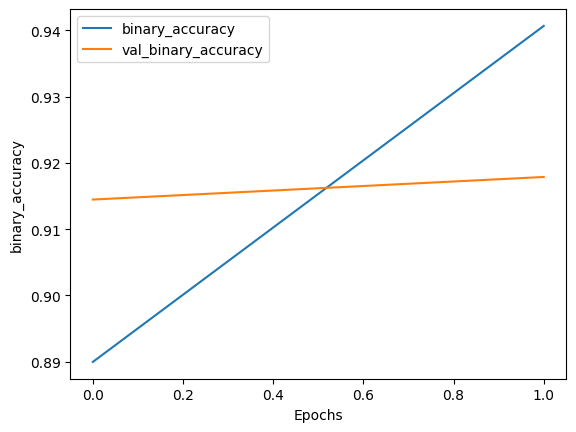

In [ ]:
plot_graphs(history, 'binary_accuracy')

In [ ]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
from tensorflow.python.keras.layers.advanced_activations import ThresholdedReLU


In [ ]:
test = pd.read_csv('Test.csv')
test.head()

,id,text,label
0,0,I always wrote this series off as being a comp...,NaN
1,1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,NaN
2,2,This movie was so poorly written and directed ...,NaN
3,3,The most interesting thing about Miryang (Secr...,NaN
4,4,"when i first read about ""berlin am meer"" i did...",NaN


In [ ]:
test_text = test['text'].tolist()

In [ ]:
type(test_text)

list

In [ ]:

test_data = tf.data.Dataset.from_tensor_slices((test_text, [0]*len(test_text)))

In [ ]:
test_data

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [ ]:
# test_data.map(test_data.map_batches(to_feature_map).batch(1))
test_data = (test_data.map(to_feature_map, 
                               num_parallel_calls= tf.data.experimental.AUTOTUNE)
  .batch(1)
  .prefetch(tf.data.experimental.AUTOTUNE))


In [ ]:
test_data

<_PrefetchDataset element_spec=({'input_word_ids': TensorSpec(shape=(None, 200), dtype=tf.int32, name=None), 'input_mask': TensorSpec(shape=(None, 200), dtype=tf.int32, name=None), 'input_type_ids': TensorSpec(shape=(None, 200), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
preds = model.predict(test_data)
# threshold= [0,1]
# ['Insincere' if pred>=threshold else 'Sincere' for pred in preds]

5000/5000 [==============================] - 97s 19ms/step


In [ ]:
preds

array([[0.03162657],
       [0.2871556 ],
       [0.00345609],
       ...,
       [0.00259619],
       [0.0013525 ],
       [0.00336978]], dtype=float32)

In [ ]:
threshold= 0.5
preds_bin = [1 if pred>=threshold else 0 for pred in preds]

In [ ]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.head()

,id,label
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [ ]:
df = pd.DataFrame({
    'id':test['id'],
    'Label':preds_bin,
})
df

,id,Label
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
4995,4995,1
4996,4996,1
4997,4997,0
4998,4998,0


In [ ]:
df.to_csv("submission_bert.csv",index=False ,header = 1)

In [ ]:
threshold= 0.47
preds_bin = [1 if pred>=threshold else 0 for pred in preds]
df = pd.DataFrame({
    'id':test['id'],
    'Label':preds_bin,
})
df
df.to_csv("submission_bert0.47.csv",index=False ,header = 1)